A Zoop é uma grande varejista que atende a todas as regiões do Brasil por meio do seu e-commerce. Ela é conhecida pela ampla variedade em seus produtos buscando atender a todo tipo de público. Ela possui uma série de centros de distribuição (CDs) para entrega de seus produtos, com grande parte situada no estado de São Paulo.

Para gerenciar o seu alcance, bem como o faturamento de seu setor em lojas online, ela consolida os dados em diferentes períodos de tempo e avalia esses dados para gerar insights e tomar algumas decisões estratégicas em seu negócio. Neste projeto, vamos ter acesso aos dados de parte da sua clientela do e-commerce dentro do ano de 2023.

Você, como analista de dados da empresa, precisará gerar visuais que auxiliem na construção de relatórios de acordo com algumas premissas passadas pelas partes interessadas realizando uma rápida análise do público que possuímos na loja virtual e do faturamento da empresa.

Problema de negócio:

O time de dados da Zoop precisa extrair os dados e gerar informações por meio de visuais que possam ser apresentados à diretoria da empresa apontando os dados de faturamento, perfil do cliente e outros indicadores que possam auxiliar na tomada de decisão em sua loja online.

Base de dados

Vamos importar duas bases de dados:

Dados de clientes do e-commerce da Zoop, separados pelo código identificador da compra.

Dados de vendas do e-commerce da Zoop em 2023, separados pelo código identificador da compra.

Esses dados serão lidos a partir do repositório compartilhado pelo GitHub.

Desafio

Você, como analista de dados do time de dados da Zoop, tem o desafio de extrair os dados de ambas as bases e construir visuais que possam agregar valor à apresentação dos resultados da Zoop em 2023. Para isso, serão repassados ao todo 7 questionamentos que foram separados para que você possa contribuir na construção do storytelling das vendas da empresa.

Para agilizar o processo da análise exploratória dos dados (AED) e a criação dos visuais, utilizaremos a IA do ChatGPT como nossa assistente, tudo isso levando em conta o prazo curto para as análises e a qualidade da entrega.

In [ ]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"

url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

url_zoop_pay = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/cadastro_zoop_pay.csv"


In [ ]:
import pandas as pd

In [ ]:
clientes = pd.read_csv(url_clientes)

In [ ]:
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [ ]:
vendas = pd.read_csv(url_vendas)

In [ ]:
vendas.tail()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
6164,6141,2023-12-31,17:49,Eletrodomésticos,1509.9,5,377.48,Cartão de Crédito
6165,6148,2023-12-31,23:02,Papelaria e escritório,14.0,2,3.36,PIX
6166,6123,2023-12-31,21:25,Alimentos e bebidas,77.9,1,7.79,Cartão de Crédito
6167,6147,2023-12-31,21:38,Livros,142.9,4,17.15,Cartão de Crédito
6168,6122,2023-12-31,22:11,Beleza e cuidados pessoais,89.9,5,13.48,Cartão de Crédito


In [ ]:
zoop_pay = pd.read_csv(url_zoop_pay)

Vamos atuar como analista de dados de um e-commerce. Recebemos duas bases de dados com os dados dos clientes e das vendas em 2023, respectivamente.

Neste primeiro momento, vamos explorar a base clientes no formato de um DataFrame, chamado "clientes". Ela contém dados dos clientes que realizaram comprar na loja virtual, sendo eles: ID da compra, ID do cliente, a cidade, estado e região da compra, idade, sexo biológico, se participam do programa de cashback e avaliação da compra.

Queremos fazer uma breve exploração dos dados para compreender um pouco sobre eles. Lembrando que os dados desta base já estão limpos e tratados. Construa um código para executar esta etapa usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [ ]:
# Verificando o número de linhas (registros) e colunas (variáveis)
clientes.shape

(6169, 9)

In [ ]:
# Verificando estatísticas descritivas para variáveis numéricas
clientes.describe()

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [ ]:
# Verificando a distribuição de uma variável categórica, por exemplo, 'sexo'
clientes['sexo_biologico'].value_counts()

sexo_biologico
Feminino     3371
Masculino    2798
Name: count, dtype: int64

In [ ]:
clientes['cashback'].value_counts()

cashback
Não    3557
Sim    2612
Name: count, dtype: int64

<Axes: >

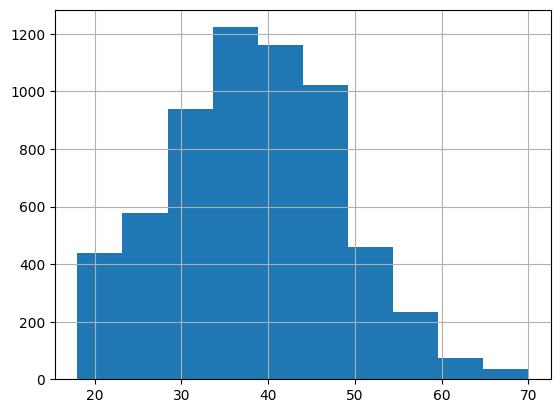

In [ ]:
# Verificando a distribuição de uma variável numérica, por exemplo, 'idade'
clientes['idade'].hist()

In [ ]:
# Contagem de clientes por região
clientes['regiao'].value_counts()

regiao
Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: count, dtype: int64

In [ ]:
clientes['avaliacao_compra'].mean()

8.44366996271681

In [ ]:
vendas["data"] = pd.to_datetime(vendas["data"], format="%Y-%m-%d")

In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_compra         6169 non-null   int64         
 1   data              6169 non-null   datetime64[ns]
 2   horario           6169 non-null   object        
 3   categoria         6169 non-null   object        
 4   preco_unitario    6169 non-null   float64       
 5   quantidade        6169 non-null   int64         
 6   frete             6169 non-null   float64       
 7   metodo_pagamento  6169 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 385.7+ KB


In [ ]:
# Contagem de vendas por categoria de produto
vendas['categoria'].value_counts()

categoria
Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodomésticos               665
Eletrônicos                    580
Papelaria e escritório         551
Ferramentas e construção       474
Livros                         301
Name: count, dtype: int64

In [ ]:
vendas.describe()

,ID_compra,data,preco_unitario,quantidade,frete
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


In [ ]:
# Supondo que temos dois DataFrames: clientes e vendas

# Unindo os DataFrames pela coluna 'ID_compra'
df = pd.merge(vendas, clientes, on='ID_compra')

# Organizando as colunas na sequência desejada
ordem_colunas = [
    'ID_compra', 'data', 'horario', 'categoria', 'preco_unitario',
    'quantidade', 'frete', 'metodo_pagamento', 'ID_cliente',
    'idade', 'sexo_biologico', 'cidade', 'uf', 'regiao', 'cashback',
    'avaliacao_compra'
]

df = df[ordem_colunas]

# Exibindo o DataFrame final
df.head()


,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


In [ ]:
zoop_pay.head()

,ID_cliente,zoop_pay
0,6149,Não
1,9491,Sim
2,5288,Não
3,9679,Sim
4,1380,Não


In [ ]:
# Unindo os DataFrames pela coluna 'ID_compra'
df2 = pd.merge(df, zoop_pay, on='ID_cliente')

# Organizando as colunas na sequência desejada
ordem_colunas = [
    'ID_compra', 'data', 'horario', 'categoria', 'preco_unitario',
    'quantidade', 'frete', 'metodo_pagamento', 'ID_cliente',
    'idade', 'sexo_biologico', 'cidade', 'uf', 'regiao', 'cashback',
    'avaliacao_compra','zoop_pay'
]

df2 = df2[ordem_colunas]

# Exibindo o DataFrame final
df2.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra,zoop_pay
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10,Não
1,2467,2023-08-02,17:10,Alimentos e bebidas,13.9,1,0.97,PIX,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,8,Não
2,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8,Sim
3,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7,Não
4,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9,Sim


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que já temos o DataFrame "df" com a coluna "metodo_pagamento"
# Criando a tabela resumida
metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['metodo_pagamento', 'quantidade']

# Exibindo a tabela
print(metodos_de_pagamento)

    metodo_pagamento  quantidade
0  Cartão de Crédito        2851
1                PIX        2244
2   Cartão de Débito         547
3             Boleto         527


<ipython-input-27-35f6349e4afc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='metodo_pagamento', y='quantidade', data=metodos_de_pagamento, palette='viridis')


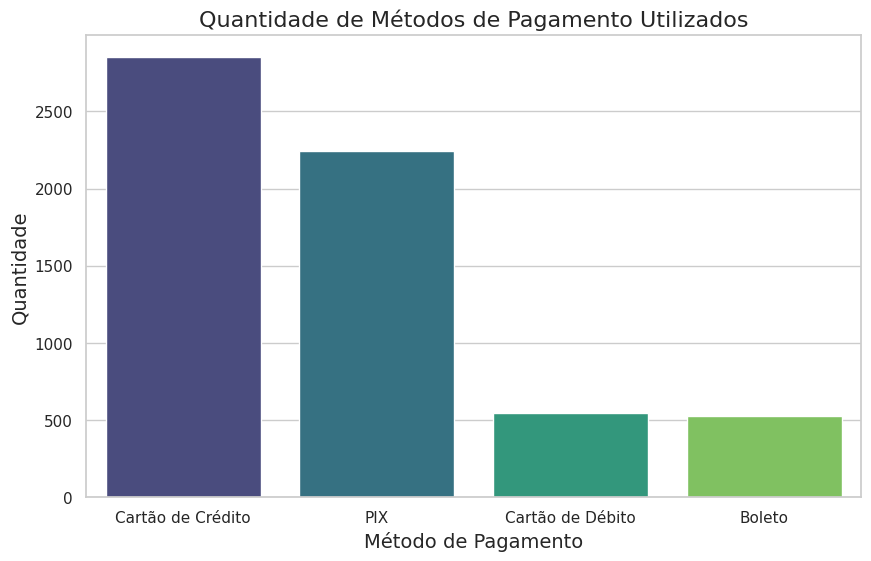

In [ ]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='metodo_pagamento', y='quantidade', data=metodos_de_pagamento, palette='viridis')

# Adicionando título e rótulos
plt.title('Quantidade de Métodos de Pagamento Utilizados', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Exibindo o gráfico
plt.show()

In [ ]:
# Supondo que já temos o DataFrame "df" com as colunas "preço unitario", "quantidade" e "categoria"
# Calculando o faturamento de cada linha
df['faturamento'] = df['preco_unitario'] * df['quantidade'] + df['frete']

# Agrupando por categoria e somando o faturamento
faturamento = df.groupby('categoria')['faturamento'].sum().reset_index()

# Ordenando a tabela de faturamento do maior para o menor
faturamento = faturamento.sort_values(by='faturamento', ascending=False)

# Exibindo a tabela
print(faturamento)

                    categoria  faturamento
4                 Eletrônicos  11025894.73
3            Eletrodomésticos   4548591.79
1  Beleza e cuidados pessoais    441649.72
2              Casa e limpeza    331036.13
5    Ferramentas e construção    264552.08
0         Alimentos e bebidas    241663.20
6                      Livros     78380.24
7      Papelaria e escritório     47239.62


<ipython-input-29-51976f6d5664>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='categoria', y='faturamento', data=faturamento, palette='viridis')


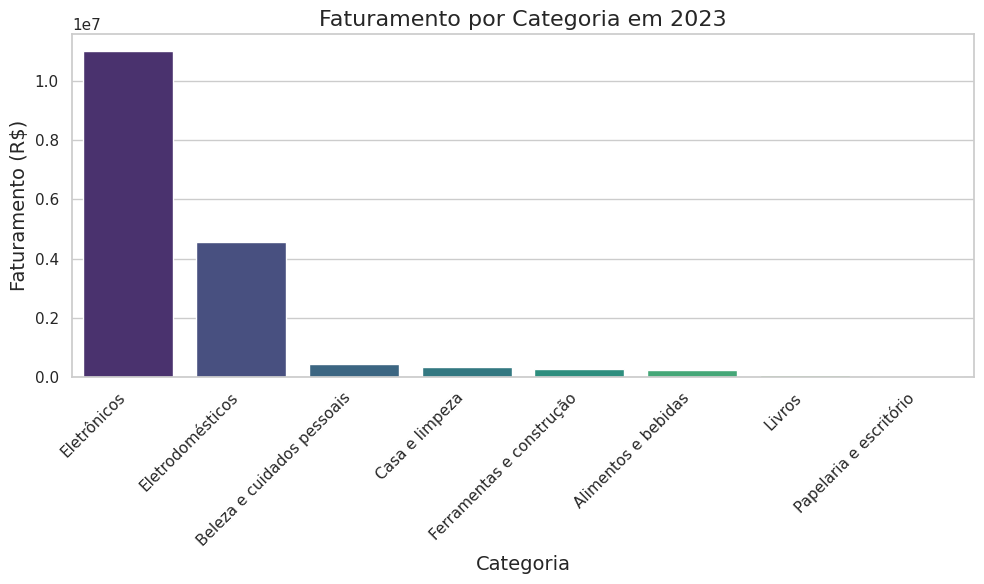

In [ ]:
# Criando o gráfico de colunas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='categoria', y='faturamento', data=faturamento, palette='viridis')

# Adicionando título e rótulos
plt.title('Faturamento por Categoria em 2023', fontsize=16)
plt.xlabel('Categoria', fontsize=14)
plt.ylabel('Faturamento (R$)', fontsize=14)

# Ajustando os rótulos do eixo X para melhor alinhamento
plt.xticks(rotation=45, ha='right')

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

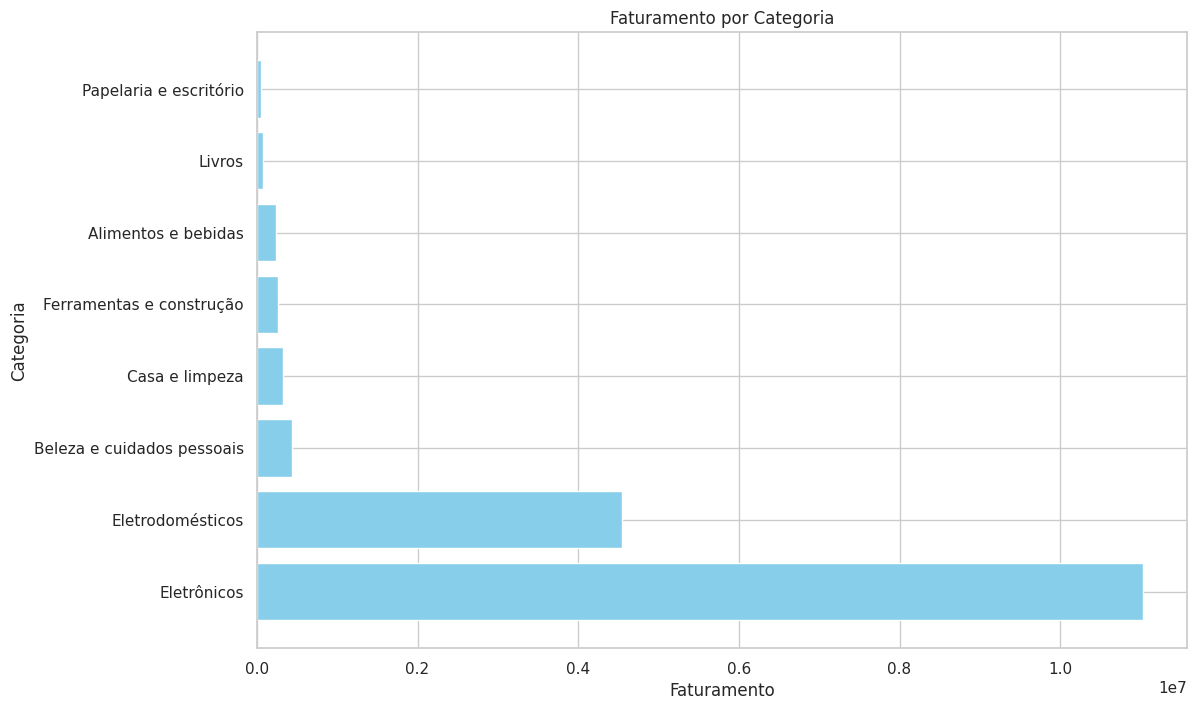

In [ ]:
# Calcular o faturamento para cada categoria
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupar por categoria e calcular o faturamento total
faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()

# Ordenar por faturamento
faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento', ascending=False)

# Visualização
plt.figure(figsize=(12, 8))
plt.barh(faturamento_por_categoria['categoria'], faturamento_por_categoria['faturamento'], color='skyblue')
plt.title('Faturamento por Categoria')
plt.xlabel('Faturamento')
plt.ylabel('Categoria')

# Exibir o gráfico
plt.show()

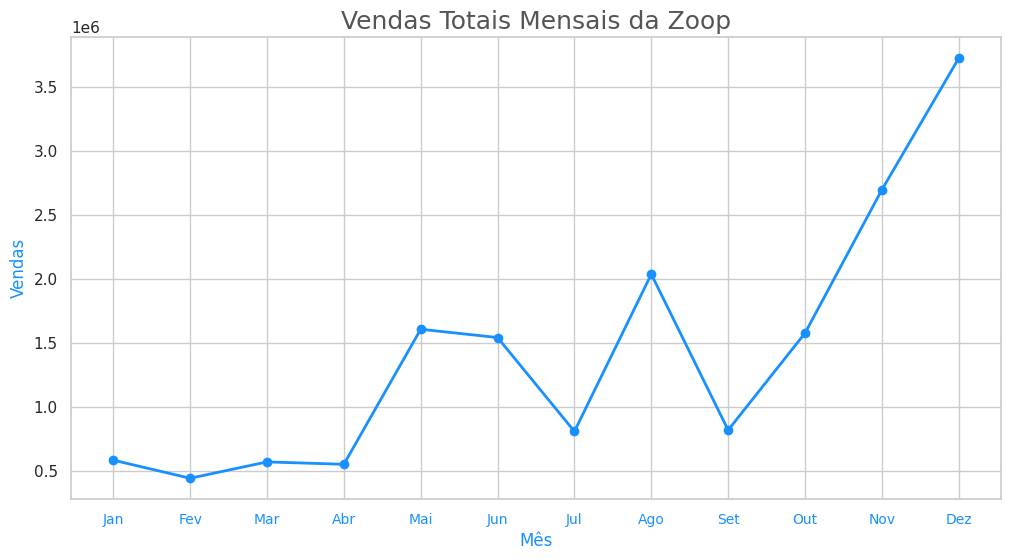

In [ ]:
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12, color='#1890FF')
plt.ylabel('Vendas', fontsize=12, color='#1890FF')

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

# Exibir o gráfico
plt.show()

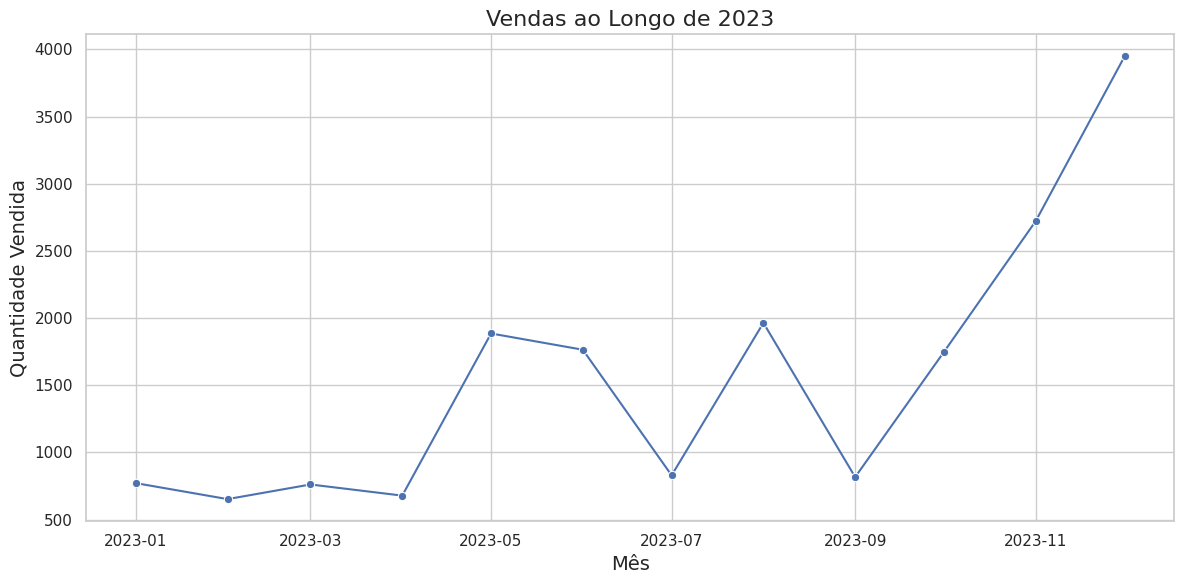

In [ ]:
# Supondo que já temos o DataFrame "df" com as colunas "quantidade" e "data"
# Convertendo a coluna "data" para o tipo datetime
df['data'] = pd.to_datetime(df['data'])

# Filtrando os dados para o ano de 2023
df_2023 = df[df['data'].dt.year == 2023]

# Agrupando por mês e somando a quantidade
quantidade = df_2023.groupby(df_2023['data'].dt.to_period('M'))['quantidade'].sum().reset_index()
quantidade['data'] = quantidade['data'].dt.to_timestamp()

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x='data', y='quantidade', data=quantidade, marker='o', linestyle='-')

# Adicionando título e rótulos
plt.title('Vendas ao Longo de 2023', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

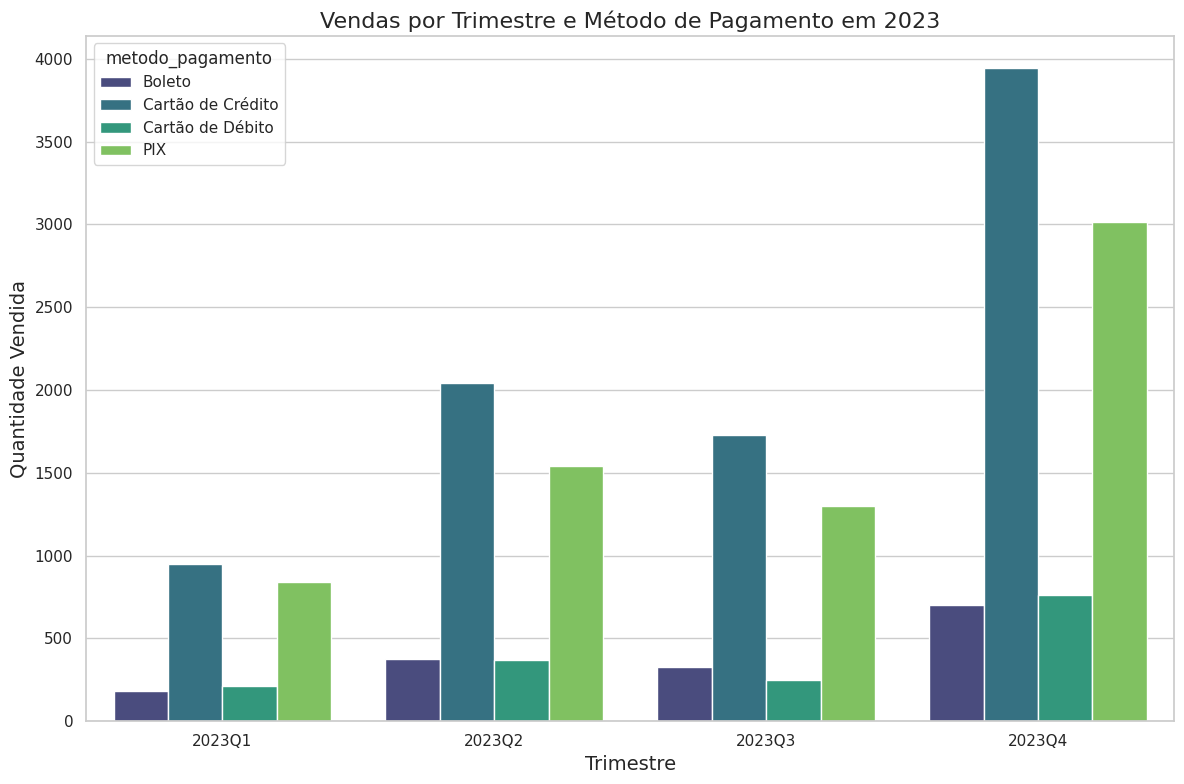

In [ ]:
# Supondo que já temos o DataFrame "df" com as colunas "quantidade", "metodo_pagamento" e "data"
# Convertendo a coluna "data" para o tipo datetime
df['data'] = pd.to_datetime(df['data'])

# Filtrando os dados para o ano de 2023
df_2023 = df[df['data'].dt.year == 2023]

# Agrupando por trimestre e método de pagamento e somando a quantidade
df_2023['trimestre'] = df_2023['data'].dt.to_period('Q')
quantidade = df_2023.groupby(['trimestre', 'metodo_pagamento'])['quantidade'].sum().reset_index()

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='trimestre', y='quantidade', hue='metodo_pagamento', data=quantidade, palette='viridis')

# Adicionando título e rótulos
plt.title('Vendas por Trimestre e Método de Pagamento em 2023', fontsize=16)
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Quantidade Vendida', fontsize=14)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

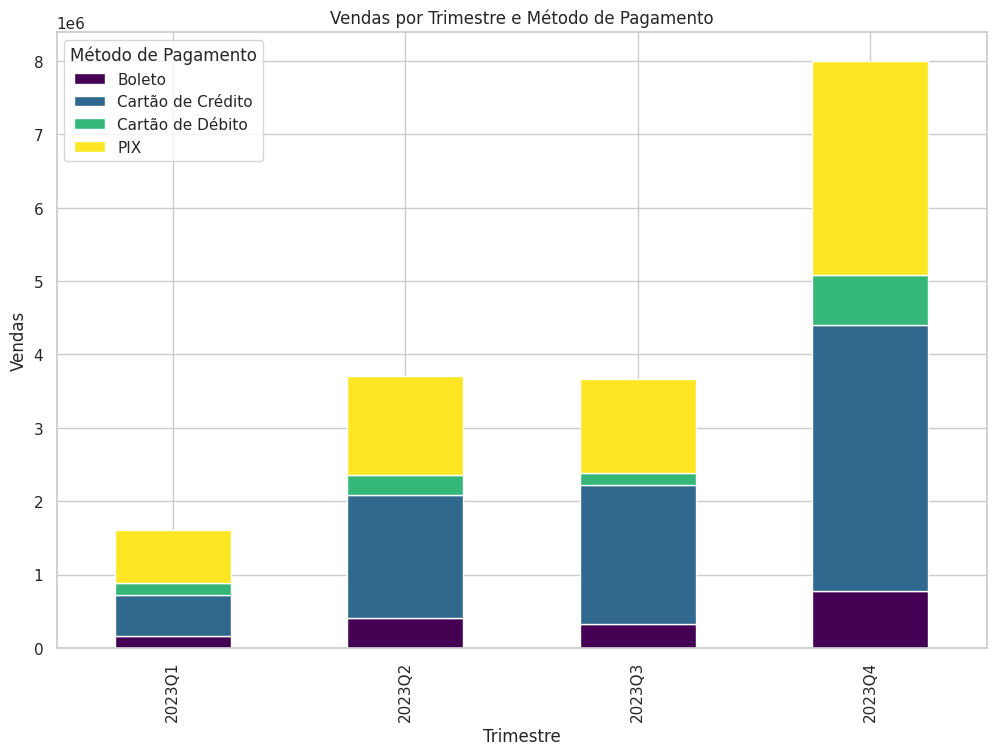

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que você tenha o DataFrame "df" carregado
# Converter a coluna 'data' para o formato datetime, se ainda não estiver
df['data'] = pd.to_datetime(df['data'])

# Criar uma nova coluna para identificar o trimestre
df['trimestre'] = df['data'].dt.to_period('Q')

# Agrupar por trimestre e método de pagamento, somando o faturamento
vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

# Visualização em gráfico de barras empilhadas
vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Vendas por Trimestre e Método de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='Método de Pagamento')

plt.show()

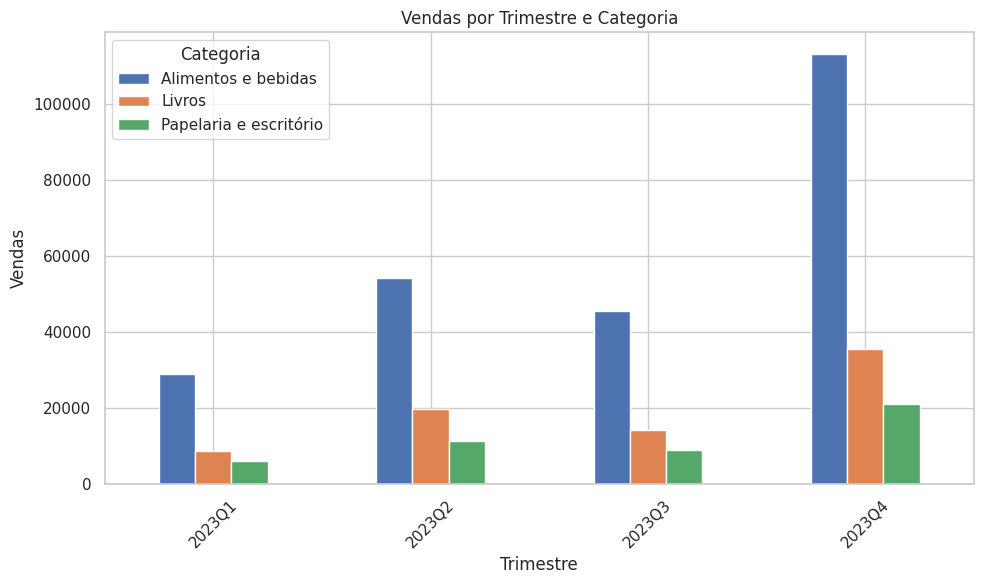

In [ ]:
# Filtrar as categorias desejadas
categorias_desejadas = ["Papelaria e escritório", "Livros", "Alimentos e bebidas"]
df_filtrado = df[df['categoria'].isin(categorias_desejadas)]

# Pivotar os dados para ter os trimestres como índice e as categorias como colunas
pivot_df = df_filtrado.pivot_table(index='trimestre', columns='categoria', values='faturamento', aggfunc='sum')

# Criar o gráfico de colunas agrupadas
pivot_df.plot(kind='bar', stacked=False, figsize=(10, 6))

# Adicionar rótulos e título
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.title('Vendas por Trimestre e Categoria')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhorar a legibilidade

# Mostrar o gráfico
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

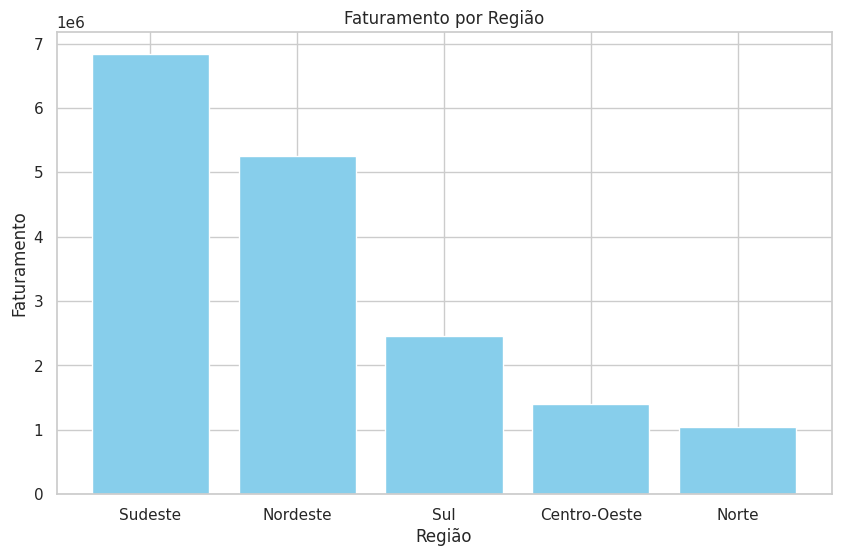

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df seja o seu DataFrame
# Calcula o faturamento para cada transação
df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

# Agrupa os dados por região e soma o faturamento
faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

# Ordena o resultado para melhor visualização
faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

# Criação do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color='skyblue')  # Plota o gráfico de barras
plt.title('Faturamento por Região')  # Adiciona título ao gráfico
plt.xlabel('Região')  # Adiciona rótulo ao eixo X
plt.ylabel('Faturamento')  # Adiciona rótulo ao eixo Y
plt.show()  # Exibe o gráfico

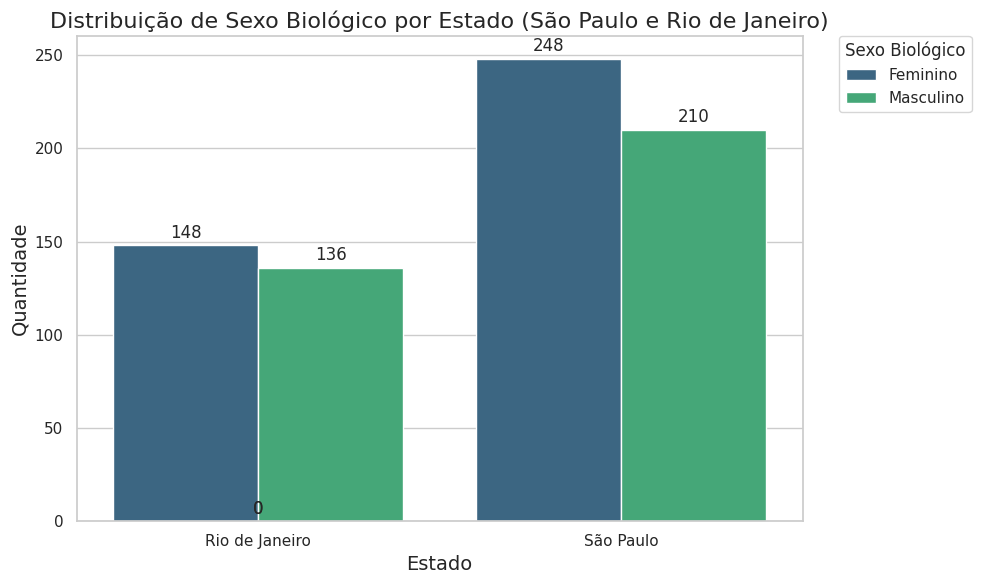

In [ ]:
df_filtered = df[df['cidade'].isin(['São Paulo', 'Rio de Janeiro'])]

# Agrupando por estado e sexo biológico e contando a quantidade
quantidade = df_filtered.groupby(['cidade', 'sexo_biologico']).size().reset_index(name='contagem')


# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='cidade', y='contagem', hue='sexo_biologico', data=quantidade, palette='viridis')

# Adicionando título e rótulos
plt.title('Distribuição de Sexo Biológico por Estado (São Paulo e Rio de Janeiro)', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Ajustando a legenda
plt.legend(title='Sexo Biológico', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

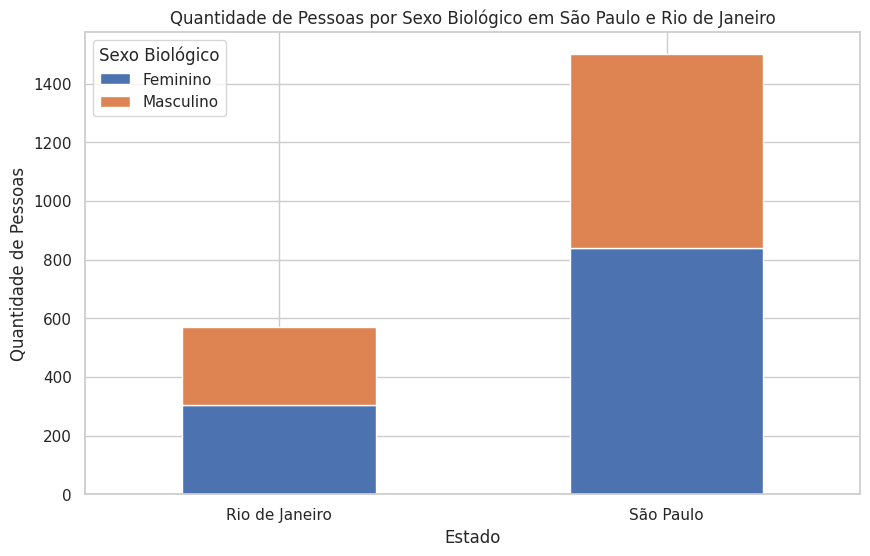

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar o DataFrame para incluir apenas os estados de "São Paulo" e "Rio de Janeiro"
df_filtrado = df[df['uf'].isin(['São Paulo', 'Rio de Janeiro'])]

# Contar a quantidade de pessoas por sexo biológico e estado
contagem_por_sexo_e_estado = df_filtrado.groupby(['uf', 'sexo_biologico']).size().unstack(fill_value=0)

# Criar o gráfico de colunas empilhadas
contagem_por_sexo_e_estado.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Pessoas por Sexo Biológico em São Paulo e Rio de Janeiro')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Pessoas')
plt.xticks(rotation=0)  # Mantém os rótulos dos estados na horizontal para melhor legibilidade

# Mostrar a legenda e o gráfico
plt.legend(title='Sexo Biológico')
plt.show()


#Perfil do Cliente

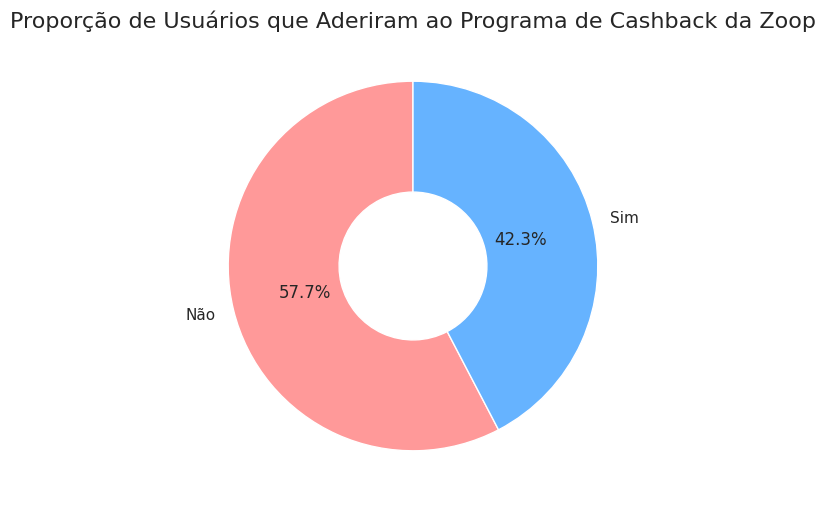

In [ ]:
# Supondo que já temos o DataFrame "df" com a coluna "cashback"
# Contando a quantidade de usuários que aderiram e não aderiram ao programa de cashback
cashback_counts = df['cashback'].value_counts()

# Configurando os dados para o gráfico de pizza
labels = cashback_counts.index
sizes = cashback_counts.values
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "explode" o 1º slice (apenas para efeito visual)

# Criando o gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Adicionando título
plt.title('Proporção de Usuários que Aderiram ao Programa de Cashback da Zoop', fontsize=16)

# Exibindo o gráfico
plt.show()

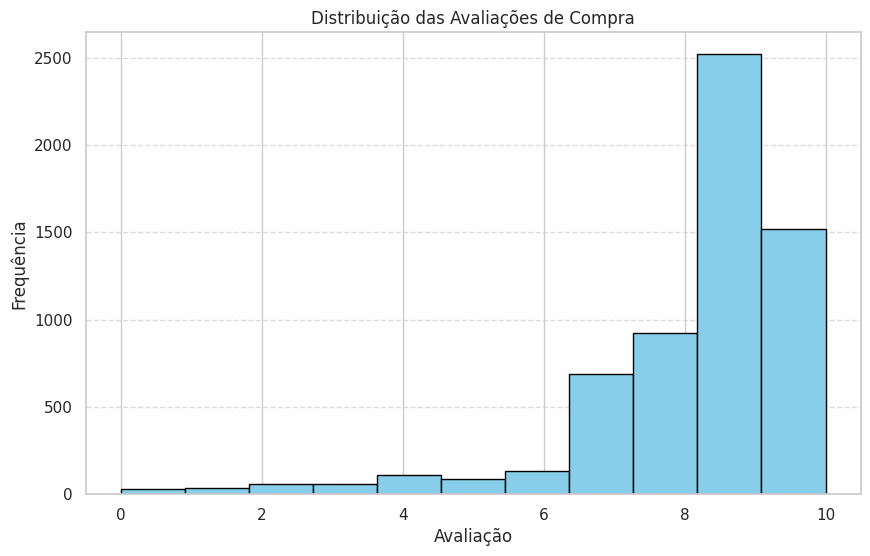

In [ ]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Visualização em histograma
plt.figure(figsize=(10, 6))
plt.hist(df['avaliacao_compra'], bins=11, edgecolor='black', color='skyblue')
plt.title('Distribuição das Avaliações de Compra')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

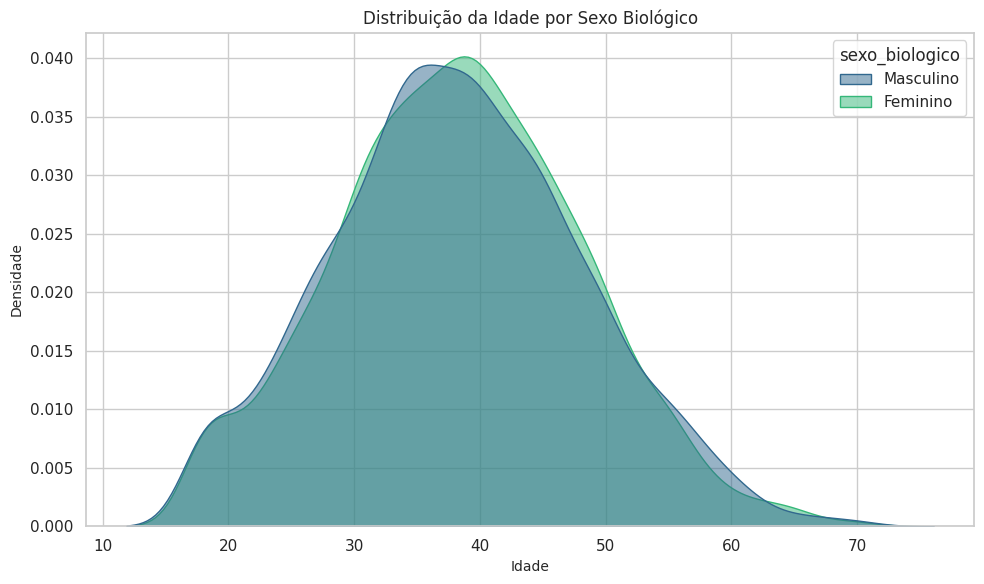

In [ ]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de densidade (KDE plot) para a distribuição de idade por sexo biológico
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(data=df, x="idade", hue="sexo_biologico", fill=True, common_norm=False, palette="viridis", alpha=0.5)

# Adicionando título e rótulos
plt.title('Distribuição da Idade por Sexo Biológico', fontsize=12)
plt.xlabel('Idade', fontsize=10)
plt.ylabel('Densidade', fontsize=10)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

<ipython-input-42-12e430222852>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="sexo_biologico", y="idade", palette="pastel")


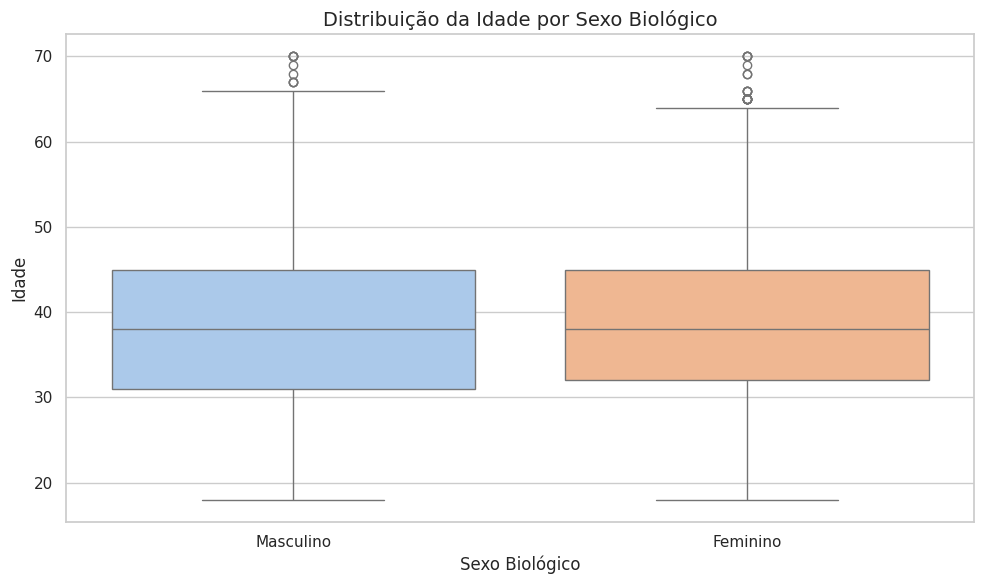

In [ ]:
# Criando o boxplot para a distribuição de idade por sexo biológico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x="sexo_biologico", y="idade", palette="pastel")

# Adicionando título e rótulos
plt.title('Distribuição da Idade por Sexo Biológico', fontsize=14)
plt.xlabel('Sexo Biológico', fontsize=12)
plt.ylabel('Idade', fontsize=12)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
import plotly.express as px

# Supondo que já temos o DataFrame "df" com as colunas "regiao", "uf" e "faturamento"
# Filtrando o DataFrame para manter apenas as colunas necessárias
vendas_2023 = df[['regiao', 'uf', 'faturamento']]

# Calculando o faturamento total por estado
vendas_agrupadas = vendas_2023.groupby(['regiao', 'uf']).sum().reset_index()

# Definindo as cores para cada região
cores_regiao = {
    "Centro-Oeste": "#0081a7",
    "Nordeste": "#00afb9",
    "Norte": "#fdfcdc",
    "Sudeste": "#fed9b7",
    "Sul": "#f07167"
}

# Criando o Treemap
fig = px.treemap(vendas_agrupadas,
                 path=['regiao', 'uf'],
                 values='faturamento',
                 color='regiao',
                 color_discrete_map=cores_regiao)

# Ajustando o layout
fig.update_layout(
    width=1400,
    height=600,
    title='Faturamento Total por Região e Estado',
    title_x=0.5
)

# Adicionando os valores dentro dos retângulos
fig.data[0].texttemplate = '%{label}<br>%{value}'

# Exibindo o gráfico
fig.show()

<ipython-input-44-c0fc4c175b6c>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




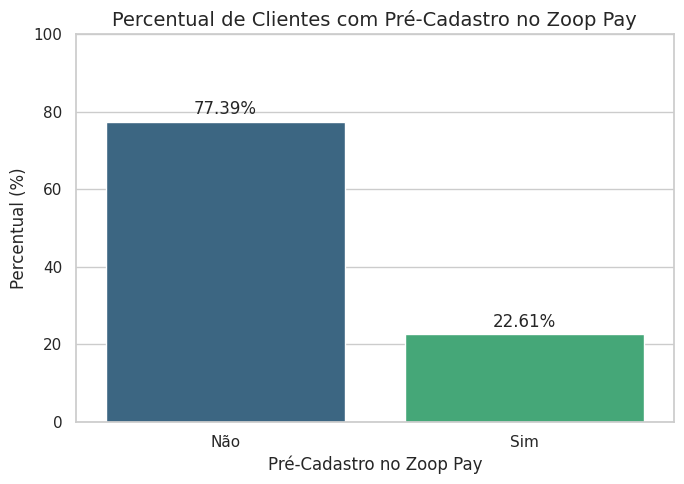

In [ ]:
# Contando a quantidade de respostas "Sim" e "Não"
zoop_pay_counts = df2['zoop_pay'].value_counts(normalize=True) * 100

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=zoop_pay_counts.index, y=zoop_pay_counts.values, palette="viridis")

# Ajustando o eixo y para mostrar a proporção de 100%
ax.set(ylim=(0, 100))

# Adicionando rótulos de dados
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Adicionando título e rótulos
plt.title('Percentual de Clientes com Pré-Cadastro no Zoop Pay', fontsize=14)
plt.xlabel('Pré-Cadastro no Zoop Pay', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

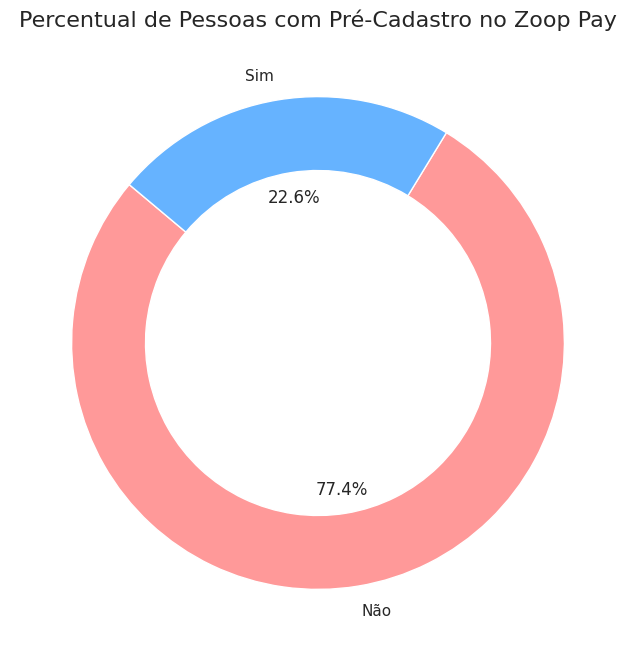

In [ ]:
zoop_pay_counts = df2['zoop_pay'].value_counts()

# Configurando os dados para o gráfico de rosca
labels = zoop_pay_counts.index
sizes = zoop_pay_counts.values
colors = ['#ff9999' ,'#66b3ff']

# Criando o gráfico de rosca
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))

# Adicionando título
plt.title('Percentual de Pessoas com Pré-Cadastro no Zoop Pay', fontsize=16)

# Exibindo o gráfico
plt.show()

<ipython-input-46-43cfa18b73c5>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




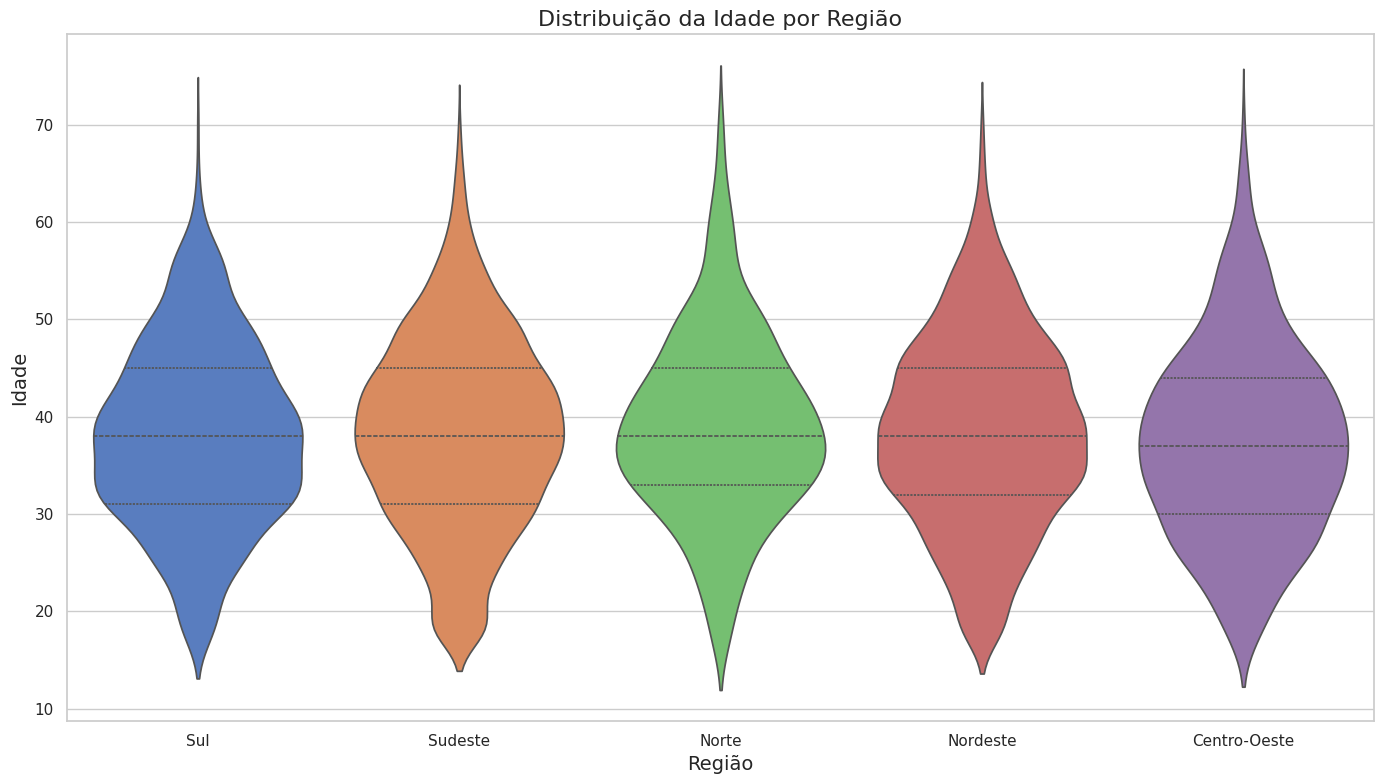

In [ ]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Criando o gráfico de violino para a distribuição de idade por região
plt.figure(figsize=(14, 8))
ax = sns.violinplot(x="regiao", y="idade", data=df, palette="muted", inner="quartile")

# Adicionando título e rótulos
plt.title('Distribuição da Idade por Região', fontsize=16)
plt.xlabel('Região', fontsize=14)
plt.ylabel('Idade', fontsize=14)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

<ipython-input-47-e8902775113d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




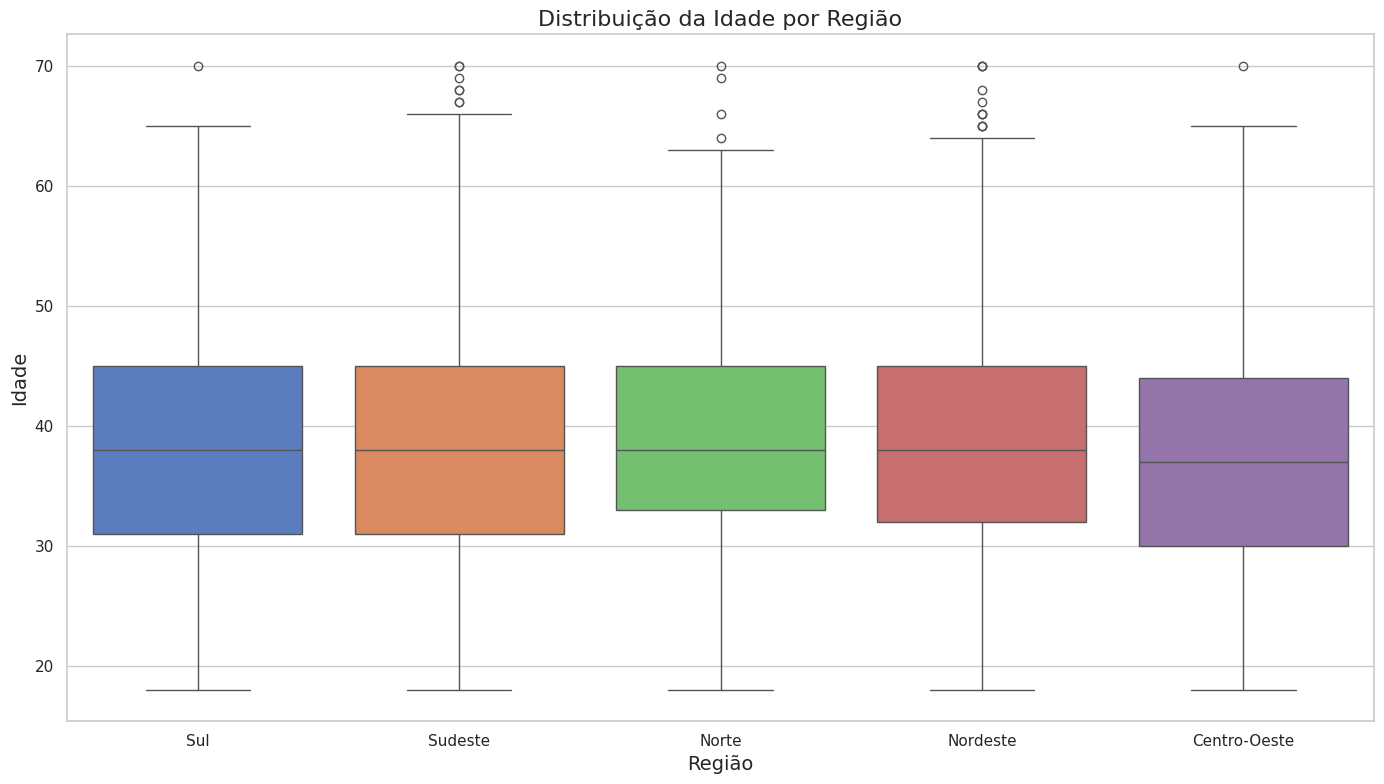

In [ ]:
# Criando o boxplot para a distribuição de idade por região
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x="regiao", y="idade", data=df, palette="muted")

# Adicionando título e rótulos
plt.title('Distribuição da Idade por Região', fontsize=16)
plt.xlabel('Região', fontsize=14)
plt.ylabel('Idade', fontsize=14)

# Ajustando o layout para garantir que tudo fique bem alinhado
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [ ]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

#Criação do relatório da Zoop

In [ ]:
def metodos_pag():
  # Agrupar por método de pagamento e contar o total de ocorrências
  metodos_de_pagamento = df['metodo_pagamento'].value_counts()

  # Calcular percentual
  total_clientes = metodos_de_pagamento.sum()
  percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100

  # Configurações do gráfico
  plt.figure(figsize=(10, 6), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)
  plt.bar(metodos_de_pagamento.index, metodos_de_pagamento, color=VERMELHO_1)

  # Adicionar texto com o total acima de cada barra
  for i, v in enumerate(metodos_de_pagamento):
      plt.text(i, v + 0.1, str(v), ha='center', va='bottom', color=AZUL_1, fontsize=11)

  # Adicionar texto dentro da área do plot
  plt.text(2, 2500, f"$\\bf{percentual:.2f}$% dos clientes utilizam Cartão de Crédito ou PIX \npara pagamento. Seria interessante recorrer a parcerias\ncom bancos para a construção de um Zoop Pay a fim\nde fidelizar a nossa clientela.",
              ha='left', va='center', color=AZUL_3, fontsize=10)

  # Configurações adicionais
  plt.title('Métodos de Pagamentos mais Utilizados em 2023', fontsize=16, color=CINZA_5)
  plt.xticks(fontsize=12, color=AZUL_1)
  plt.yticks([]) #Tirando as linhas de grade do eixo y
  plt.xticks([]) #Tirando as linhas de grade do eixo x
  ax.spines[['top', 'right', 'left']].set_visible(False)

  return plt

In [ ]:
def vendas_mensais():
  # Dicionário de tradução de meses
  meses = {
      'January': 'Jan',
      'February': 'Fev',
      'March': 'Mar',
      'April': 'Abr',
      'May': 'Mai',
      'June': 'Jun',
      'July': 'Jul',
      'August': 'Ago',
      'September': 'Set',
      'October': 'Out',
      'November': 'Nov',
      'December': 'Dez'
  }

  # Agrupar por mês e calcular as vendas totais
  df['mes'] = df['data'].dt.strftime('%B')
  vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

  # Configurações do gráfico
  plt.figure(figsize=(18, 10), facecolor=CINZA_1)
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)
  plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color=AZUL_1, linewidth=2)

  # Adicionar rótulos e título
  plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('')

  # Formatando rótulos do eixo y em "R$ valor M"
  formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
  ax.set_yticks(ax.get_yticks())  # para evitar o Warning
  ax.set_yticklabels(formatted_yticks, fontsize=12, color=AZUL_1)

  # Configurações adicionais
  plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=12, color=AZUL_1)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # Remover linhas de grade
  ax.grid(False)

  # Adicionar círculos numerados
  for i, point in enumerate([(4, vendas_mensais.iloc[4]), (7, vendas_mensais.iloc[7]), (10, vendas_mensais.iloc[10]), (11, vendas_mensais.iloc[11])], start=1):
      plt.scatter(point[0], point[1], s=200, color='none', edgecolors=VERMELHO_1, alpha=0.7)
      plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color=VERMELHO_1)

  # Adicionar textos explicativos
  textos = [
      "1. No mês de Maio, temos uma das datas mais relevantes em vendas:\n   Dia das Mães; o que pode justificar o aumento das vendas da Zoop.",
      "2. No mês de Agosto, temos 2 situações que podem justificar:\n   a volta às aulas no 2º semestre em alguns estados brasileiros e o Dia dos Pais.",
      "3. No mês de Novembro, fica o destaque a Black Friday,\n   um dos principais períodos de alta das vendas, considerado de grande relevância ao Varejo.",
      "4. No mês de Dezembro, temos o Natal e as festividades de Ano Novo,\n   considerados, não só na Zoop, o período de maior vendas do Varejo."
  ]

  # Ajustar a margem direita para acomodar os textos explicativos
  plt.subplots_adjust(right=0.7)

  # Adicionar os textos à direita do gráfico com linhas de conexão
  for i, (texto, point) in enumerate(zip(textos, [(4, vendas_mensais.iloc[4]), (7, vendas_mensais.iloc[7]), (10, vendas_mensais.iloc[10]), (11, vendas_mensais.iloc[11])])):
      plt.text(12, vendas_mensais.max() - i*0.5*(vendas_mensais.max()/len(textos)), texto, fontsize=10, color=AZUL_1, va='top', ha='left', wrap=True)
      plt.plot([point[0], 11.5], [point[1], vendas_mensais.max() - i*0.5*(vendas_mensais.max()/len(textos))], color=VERMELHO_1, linestyle='--', linewidth=1)

  # Ajustando o layout para garantir que tudo fique bem alinhado
  plt.tight_layout()

  return plt

In [ ]:
def faturamento_por_regiao():
  # Agrupa os dados por região e soma o faturamento
  faturamento_por_regiao = df.groupby('regiao')['faturamento'].sum().reset_index()

  # Ordena o resultado para melhor visualização
  faturamento_por_regiao = faturamento_por_regiao.sort_values(by='faturamento', ascending=False)

  # Criação do gráfico de colunas
  plt.figure(figsize=(10, 6), facecolor=CINZA_1)  # Ajusta o tamanho do gráfico e o plano de fundo

  ax = plt.axes()
  ax.set_facecolor(CINZA_1)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  bars = plt.bar(faturamento_por_regiao['regiao'], faturamento_por_regiao['faturamento'], color=AQUA_1)  # Plota o gráfico de barras
  bars[0].set_color(AQUA_3)  # Destaca a região com maior faturamento

  # Adiciona título e rótulos
  plt.title('Faturamento por Região', fontsize=16, color=CINZA_5)
  plt.xlabel('Região', fontsize=10, color=AZUL_1)
  plt.ylabel('Faturamento', fontsize=10, color=AZUL_1)
  plt.xticks(fontsize=10, color=AZUL_1)
  plt.yticks(fontsize=10, color=AZUL_1)

  # Formatando rótulos do eixo y em "R$ valor M"
  formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
  ax.set_yticks(ax.get_yticks())  # para evitar o Warning
  ax.set_yticklabels(formatted_yticks, fontsize=12, color=AZUL_1)

  # Adiciona valores nas barras
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width()/2, yval, 'R$ {:.2f} M'.format(yval / 1e6),
              va='bottom', ha='center', fontsize=12, color=AZUL_1)

  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

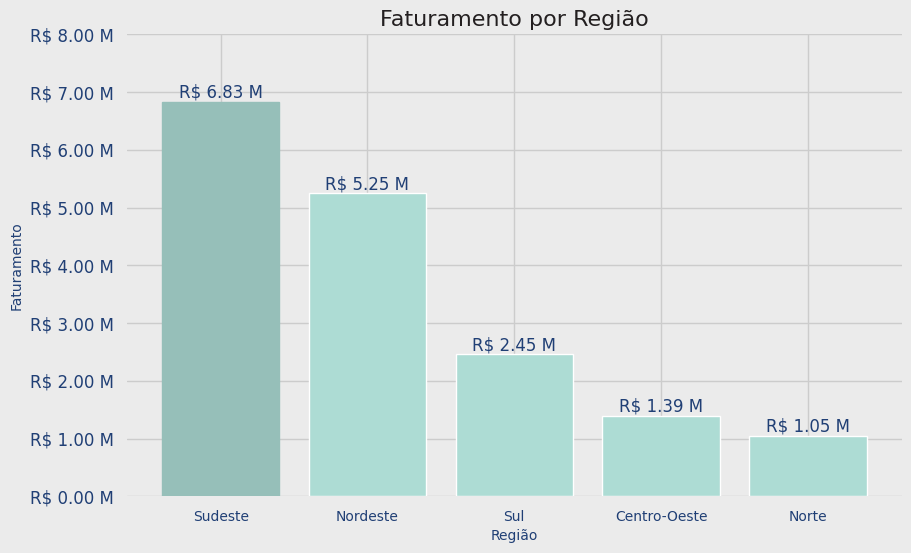

In [ ]:
faturamento_por_regiao()

In [ ]:
def grafico_zoop_pay():
  # Supondo que df seja o seu DataFrame
  # Contagem dos valores de 'zoop_pay'
  zoop_pay_counts = df2['zoop_pay'].value_counts()

  # Configurando os dados para o gráfico de rosca
  labels = zoop_pay_counts.index
  sizes = zoop_pay_counts.values
  colors = [CINZA_3 , AZUL_1 ]  # AZUL_1 para 'Sim' e CINZA_3 para 'Não'
  label_colors = {'Não': CINZA_3 , 'Sim': AZUL_1 }  # Dicionário para cores dos rótulos

  # Criando o gráfico de rosca
  plt.figure(figsize=(6, 6), facecolor = CINZA_1)  # Plano de fundo da figura CINZA_1
  wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                    startangle=140, wedgeprops=dict(width=0.4), pctdistance=0.8, textprops=dict(fontsize=12))

  # Ajustando cores dos textos
  for text in texts:
      text.set_color(label_colors[text.get_text()])  # Cor do rótulo da fatia
  for autotext in autotexts:
      autotext.set_color('white')  # Cor da porcentagem
      autotext.set_fontsize(12)
      autotext.set_fontweight('bold')

  # Adicionando título
  plt.title('Percentual de Pessoas com Pré-Cadastro no Zoop Pay', fontsize=16, color=CINZA_5)  # Título na cor CINZA_5

  # Remover bordas desnecessárias
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  return plt

In [ ]:
def faturamento_por_categoria():
  # Calcular o faturamento para cada categoria
  df['faturamento'] = (df['preco_unitario'] * df['quantidade']) + df['frete']

  # Agrupar por categoria e calcular o faturamento total
  faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().reset_index()

  # Ordenar por faturamento
  faturamento_por_categoria = faturamento_por_categoria.sort_values(by='faturamento', ascending=False)

  # Calcular o percentual da 1ª categoria
  percentual = (faturamento_por_categoria['faturamento'].iloc[0] / faturamento_por_categoria['faturamento'].sum()) * 100

  # Visualização
  plt.figure(figsize=(10, 6), facecolor=CINZA_1)  # Plano de fundo CINZA_1
  ax = plt.axes()
  ax.set_facecolor(CINZA_1)  # Plano de fundo da área plotada CINZA_1


  # Barras horizontais
  bars = plt.barh(faturamento_por_categoria['categoria'], faturamento_por_categoria['faturamento'], color=AQUA_1)  # Cor AQUA_1

  # Adicionar rótulos e título
  plt.title('Faturamento por Categoria de Produto em 2023', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('')
  plt.yticks(fontsize=12, color=AZUL_1)
  plt.xticks([])
  ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
  ax.yaxis.grid(False)

  # Suprimir labels dos eixos
  plt.xlabel('')
  plt.ylabel('')

  # Configuração dos rótulos do eixo y
  plt.yticks(fontsize=12, color=AZUL_1)  # Cor AZUL_1

  # Suprimir rótulos do eixo x
  plt.xticks([])

  # Exibir o total do faturamento de cada categoria do lado direito da barra
  for bar in bars:
      width = bar.get_width()
      plt.text(width, bar.get_y() + bar.get_height() / 2, f'R$ {width:,.2f}',
              ha='left', va='center', color=AZUL_1, fontsize=12)  # Cor AZUL_1

  # Adicionar texto explicativo na área do plot
  plt.text(0.4e7, 5, f"$\\bf{percentual:.2f}$% das vendas correspondem apenas as vendas de Eletrônicos.\n"
                    "Isso é equivalente a quase o dobro em relação a todas as outras categorias\n"
                    "presentes no portfólio da Zoop.",
          fontsize=12, color=AZUL_3, va='center')  # Cor AZUL_3
  return plt

In [ ]:
def grafico_cashback():
  # Supondo que já temos o DataFrame "df" com a coluna "cashback"
  # Contando a quantidade de usuários que aderiram e não aderiram ao programa de cashback
  cashback_counts = df['cashback'].value_counts()

  # Configurando os dados para o gráfico de rosca
  labels = cashback_counts.index
  sizes = cashback_counts.values
  colors = [CINZA_3 , AZUL_1 ]  # AZUL_1 para 'Sim' e CINZA_3 para 'Não'
  label_colors = {'Não': CINZA_3 , 'Sim': AZUL_1 }  # Dicionário para cores dos rótulos

  # Criando o gráfico de rosca
  plt.figure(figsize=(6, 6), facecolor = CINZA_1)  # Plano de fundo da figura CINZA_1
  wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                    startangle=180, wedgeprops=dict(width=0.4), pctdistance=0.8, textprops=dict(fontsize=12))

  # Ajustando cores dos textos
  for text in texts:
      text.set_color(label_colors[text.get_text()])  # Cor do rótulo da fatia
  for autotext in autotexts:
      autotext.set_color('white')  # Cor da porcentagem
      autotext.set_fontsize(12)
      autotext.set_fontweight('bold')

  # Adicionando título
  plt.title('Percentual de Pessoas com Pré-Cadastro no Zoop Pay', fontsize=16, color=CINZA_5)  # Título na cor CINZA_5

  # Remover bordas desnecessárias
  ax = plt.gca()
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

  return plt

In [ ]:
 def vendas_por_trim():
  # Supondo que você tenha o DataFrame "df" carregado
  # Converter a coluna 'data' para o formato datetime, se ainda não estiver
  df['data'] = pd.to_datetime(df['data'])

  # Criar uma nova coluna para identificar o trimestre
  df['trimestre'] = df['data'].dt.to_period('Q')

  # Agrupar por trimestre e método de pagamento, somando o faturamento
  vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()


  # Visualização em gráfico de barras empilhadas
  fig, ax = plt.subplots(figsize=(10, 6), facecolor=CINZA_1)
  vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(10, 6), color=[BRANCO, CINZA_3, AQUA_1, AQUA_3], ax=ax)

  # Ajustando cores e título
  ax.set_facecolor(CINZA_1)
  plt.title('Vendas por Trimestre e Método de Pagamento em 2023', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('')

  # Ajustando os rótulos do eixo x e y
  plt.xticks(rotation=0, color=AZUL_1, fontsize=12)
  plt.yticks(ax.get_yticks(), ['R$ {:.0f} M'.format(val/1e6) for val in ax.get_yticks()], fontsize=12, color=AZUL_1)

  # Removendo as bordas
  for spine in ['top', 'right', 'bottom', 'left']:
      ax.spines[spine].set_visible(False)

  # Adicionando grid tracejado no eixo y
  ax.yaxis.grid(True, linestyle='--', linewidth=0.7, color=CINZA_3)

  return plt

In [ ]:
 def avaliacao_compra():

  # Supondo que você tenha o DataFrame "df" carregado e a coluna 'avaliacao_compra' presente
  # Configurando o estilo dos gráficos
  sns.set(style="whitegrid")

  # Visualização em histograma
  fig, ax = plt.subplots(figsize=(10, 6), facecolor=CINZA_1)
  ax.set_facecolor(CINZA_1)
  plt.hist(df['avaliacao_compra'], bins=11, edgecolor='black', color=VERMELHO_1)

  # Título e labels
  plt.title('Distribuição das avaliações das compras em 2023', fontsize=18, color=CINZA_5)
  plt.xlabel('Avaliação', fontsize=12, color=AZUL_1)
  plt.ylabel('Frequência', fontsize=12, color=AZUL_1)

  # Ajustando os rótulos dos eixos
  plt.xticks(range(11), fontsize=12, color=AZUL_1)
  plt.yticks(fontsize=12, color=AZUL_1)

  # Removendo as bordas
  for spine in ['top', 'right', 'bottom', 'left']:
      ax.spines[spine].set_visible(False)

  # Configurando o grid do y
  ax.set_axisbelow(True)
  plt.grid(axis='y', linestyle='--', alpha=0.7, color=CINZA_3)
  ax.xaxis.grid(False)

  # Dados para a anotação
  media_avaliacoes = df['avaliacao_compra'].mean().round(2)
  avaliacao_mais_comum = df['avaliacao_compra'].value_counts().idxmax()
  frequencia_mais_comum = df['avaliacao_compra'].value_counts().max()

  # Adicionando anotação
  anotacao_texto = (
      f"Média de avaliações = {media_avaliacoes}\n"
      f"Avaliação mais comum = {avaliacao_mais_comum}\n"
      f"Frequência da mais comum = {frequencia_mais_comum}"
  )
  ax.annotate(
      anotacao_texto,
      xy=(9, 2250), xycoords='data',
      xytext=(2, 1800), textcoords='data',
      fontsize=12, color=AZUL_1,
      bbox=dict(boxstyle="round,pad=0.3", edgecolor=CINZA_3, facecolor=BRANCO),
      arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=AZUL_1)
  )

  return plt

In [ ]:
def grafico_distribuicao_por_sexo():
  # Criando a figura e o eixo
  fig, ax = plt.subplots(figsize=(10, 6), facecolor=CINZA_1)
  ax.set_facecolor(CINZA_1)

  # Visualização em boxplot
  sns.boxplot(data=df, x='sexo_biologico', y='idade', palette=[AZUL_1, AQUA_1], ax=ax)

  # Título e labels
  plt.title('Distribuição da Idade por Sexo Biológico dos(as) clientes', fontsize=18, color=CINZA_5)
  plt.xlabel('')
  plt.ylabel('Idade', fontsize=12, color=AZUL_1)

  # Ajustando os rótulos dos eixos
  plt.xticks(fontsize=12, color=AZUL_1)
  plt.yticks(fontsize=12, color=AZUL_1)

  # Removendo as bordas
  for spine in ['top', 'right', 'bottom', 'left']:
      ax.spines[spine].set_visible(False)

  # Configurando o grid do y
  ax.set_axisbelow(True)
  plt.grid(axis='y', linestyle='--', alpha=0.7, color=CINZA_3)

  # Dados para as anotações
  min_m = df.groupby("sexo_biologico")["idade"].min()[1]
  q1_m = df.groupby("sexo_biologico")["idade"].quantile(.25)[1]
  median_m = df.groupby("sexo_biologico")["idade"].median()[1]
  q3_m = df.groupby("sexo_biologico")["idade"].quantile(.75)[1]
  max_m = df.groupby("sexo_biologico")["idade"].max()[1]

  min_f = df.groupby("sexo_biologico")["idade"].min()[0]
  q1_f = df.groupby("sexo_biologico")["idade"].quantile(.25)[0]
  median_f = df.groupby("sexo_biologico")["idade"].median()[0]
  q3_f = df.groupby("sexo_biologico")["idade"].quantile(.75)[0]
  max_f = df.groupby("sexo_biologico")["idade"].max()[0]

  # Adicionando anotações
  anotacao_texto_m = (
      f"Mínimo = {min_m}\n"
      f"1º quartil = {q1_m}\n"
      f"2º quartil = {median_m}\n"
      f"3º quartil = {q3_m}\n"
      f"Máximo = {max_m}"
  )
  anotacao_texto_f = (
      f"Mínimo = {min_f}\n"
      f"1º quartil = {q1_f}\n"
      f"2º quartil = {median_f}\n"
      f"3º quartil = {q3_f}\n"
      f"Máximo = {max_f}"
  )

  ax.annotate(
      anotacao_texto_m,
      xy=(0.9, 45), xycoords='data',
      xytext=(0.6, 50), textcoords='data',
      fontsize=12, color=AZUL_1,
      bbox=dict(boxstyle="round,pad=0.3", edgecolor=CINZA_3, facecolor=BRANCO),
      arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=AZUL_1)
  )

  ax.annotate(
      anotacao_texto_f,
      xy=(-0.1, 45), xycoords='data',
      xytext=(-0.4, 50), textcoords='data',
      fontsize=12, color=AZUL_1,
      bbox=dict(boxstyle="round,pad=0.3", edgecolor=CINZA_3, facecolor=BRANCO),
      arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=AZUL_1)
  )

  return plt

<ipython-input-58-16d7789ab914>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

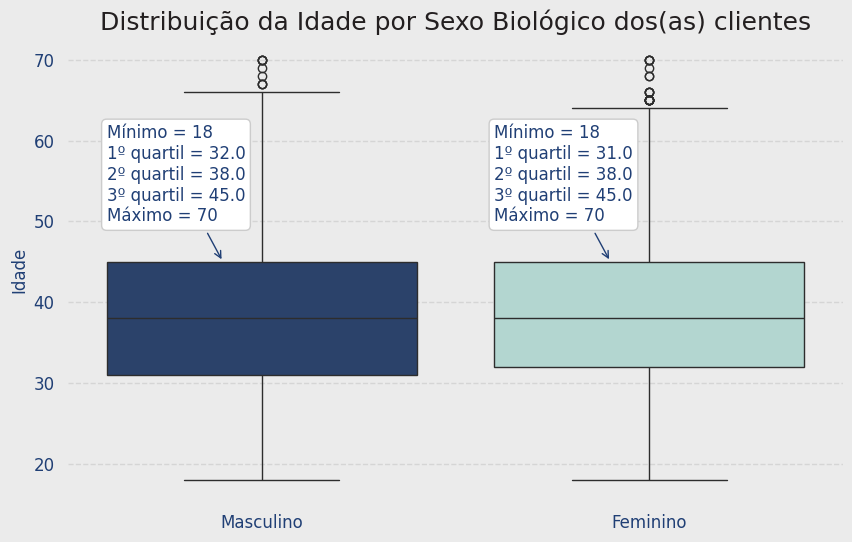

In [ ]:
grafico_distribuicao_por_sexo()

In [ ]:
# Função para salvar os gráficos como imagens
def salvar_grafico(grafico, nome):
    imagem = grafico()
    imagem.savefig(f'{nome}.png', bbox_inches='tight')
    imagem.close()

# Salvando os gráficos
salvar_grafico(metodos_pag, 'grafico_metodos_pag')
salvar_grafico(vendas_mensais, 'grafico_vendas_mensais')
salvar_grafico(faturamento_por_regiao, 'grafico_faturamento_por_regiao')
salvar_grafico(grafico_zoop_pay, 'grafico_grafico_zoop_pay')
salvar_grafico(faturamento_por_categoria, 'grafico_faturamento_por_categoria')
salvar_grafico(vendas_por_trim, 'grafico_vendas_por_trim')
salvar_grafico(grafico_cashback, 'grafico_grafico_cashback')
salvar_grafico(avaliacao_compra, 'grafico_avaliacao_compra')
salvar_grafico(grafico_distribuicao_por_sexo, 'grafico_grafico_distribuicao_por_sexo')

<ipython-input-58-16d7789ab914>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [ ]:
pip install reportlab pillow

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch

def criar_relatorio_pdf(nome_arquivo_pdf, lista_imagens, logo_path, informacoes_empresa, intuito_relatorio):
    # Criando o documento PDF
    doc = SimpleDocTemplate(nome_arquivo_pdf, pagesize=letter)
    # Estilos de parágrafo
    styles = getSampleStyleSheet()

    # Estilo personalizado para alinhar o título à esquerda
    left_aligned_style = ParagraphStyle(
        name='LeftAligned',
        parent=styles['Heading1'],
        alignment=0  # 0 é para alinhamento à esquerda
    )

    # Estilo personalizado para centralizar texto com fonte 16 e espaçamento entre linhas de 1.5
    centered_style = ParagraphStyle(
        name='Centered',
        parent=styles['Normal'],
        alignment=1,  # 1 é para alinhamento central
        fontSize=16,
        leading=24  # Espaçamento entre linhas de 1,5 vezes o tamanho da fonte (16 * 1.5)
    )

    flowables = []

    # Adicionando a capa com a logomarca centralizada
    flowables.append(Spacer(1, 100))
    try:
        logo = Image(logo_path, width=3*inch, height=3*inch)
        logo.hAlign = 'CENTER'  # Centraliza a imagem
        flowables.append(logo)
    except Exception as e:
        print(f"Erro ao carregar a logomarca: {e}")
    flowables.append(PageBreak())

    # Adicionando a segunda página com as informações da empresa e o intuito do relatório centralizado
    paragrafo_informacoes = Paragraph(informacoes_empresa, centered_style)
    paragrafo_intuito = Paragraph(intuito_relatorio, centered_style)
    flowables.append(paragrafo_informacoes)
    flowables.append(Spacer(1, 12))
    flowables.append(paragrafo_intuito)
    flowables.append(PageBreak())

    for imagem in lista_imagens:
        # Adicionando título do gráfico
        titulo = imagem['titulo']
        paragrafo = Paragraph(titulo, left_aligned_style)
        flowables.append(paragrafo)
        flowables.append(Spacer(1, 12))

        # Adicionando a imagem
        img_path = imagem['path']
        try:
            with PILImage.open(img_path) as img:
                width, height = img.size
                aspect = height / float(width)
                desired_width = 6.5 * inch
                desired_height = desired_width * aspect
                if desired_height > 9 * inch:
                    desired_height = 9 * inch
                    desired_width = desired_height / aspect
                img = Image(img_path, width=desired_width, height=desired_height)
                img.hAlign = 'CENTER'
                flowables.append(img)
        except Exception as e:
            print(f"Erro ao carregar a imagem {img_path}: {e}")

        flowables.append(Spacer(1, 24))
        flowables.append(PageBreak())

    # Construindo o PDF
    doc.build(flowables)

# Definindo as informações da empresa e o intuito do relatório
logo_path = 'zoop-logo.png'
informacoes_empresa = (
    "Informações da Empresa:\n"
    "Nome: Zoop\n"
    "Endereço: Rua Exemplo, 123\n"
    "Cidade: São Paulo\n"
    "Estado: SP\n"
    "CEP: 00000-000\n"
    "Telefone: (11) 1234-5678\n"
    "Email: contato@zoop.com"
)
intuito_relatorio = (
    "Intuito do Relatório:\n"
    "Este relatório tem como objetivo apresentar uma análise detalhada das vendas, "
    "métodos de pagamento, faturamento e outras métricas relevantes da empresa Zoop "
    "ao longo do ano de 2023. Ele visa fornecer insights que possam auxiliar na tomada "
    "de decisões estratégicas para o próximo ano."
)

# Lista de imagens e seus títulos
lista_imagens = [
    {'titulo': 'Métodos de Pagamento', 'path': 'grafico_metodos_pag.png'},
    {'titulo': 'Vendas Mensais', 'path': 'grafico_vendas_mensais.png'},
    {'titulo': 'Faturamento por Região', 'path': 'grafico_faturamento_por_regiao.png'},
    {'titulo': 'Zoop Pay', 'path': 'grafico_grafico_zoop_pay.png'},
    {'titulo': 'Faturamento por Categoria', 'path': 'grafico_faturamento_por_categoria.png'},
    {'titulo': 'Vendas por Trimestre', 'path': 'grafico_vendas_por_trim.png'},
    {'titulo': 'Cashback', 'path': 'grafico_grafico_cashback.png'},
    {'titulo': 'Avaliação de Compra', 'path': 'grafico_avaliacao_compra.png'},
    {'titulo': 'Distribuição por Sexo', 'path': 'grafico_grafico_distribuicao_por_sexo.png'}
]

# Criando o relatório em PDF
criar_relatorio_pdf('relatorio_graficos.pdf', lista_imagens, logo_path, informacoes_empresa, intuito_relatorio)

Erro ao carregar a imagem grafico_metodos_pag.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_vendas_mensais.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_faturamento_por_regiao.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_grafico_zoop_pay.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_faturamento_por_categoria.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_vendas_por_trim.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_grafico_cashback.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_avaliacao_compra.png: name 'PILImage' is not defined
Erro ao carregar a imagem grafico_grafico_distribuicao_por_sexo.png: name 'PILImage' is not defined
